In [81]:
#Data Manipulation
import pandas as pd
import numpy as np
import math

#Visualitation
import seaborn as sns
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
file_path = "loan_data_2007_2014.csv"
data = pd.read_csv(file_path)


C:\Users\ASUS A456UR\AppData\Local\Temp\ipykernel_2624\2025469351.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
data.shape

(466285, 75)

In [77]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [5]:
data.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63093,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,14-Oct,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,16-Jan,16-Feb,16-Jan,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [6]:
data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


Data Preprocessing : Menghapus Kolom yang tidak relevan dan tidak ada nilainya

In [7]:
df = data.copy()

In [8]:
df = df.dropna(axis=1, how='all')

In [9]:
df['member_id'].value_counts()

member_id
1296599     1
28653081    1
28692177    1
28702376    1
28763241    1
           ..
4686866     1
4847180     1
4724047     1
4678105     1
11061576    1
Name: count, Length: 466285, dtype: int64

In [10]:
df['id']

0         1077501
1         1077430
2         1077175
3         1076863
4         1075358
           ...   
466280    8598660
466281    9684700
466282    9584776
466283    9604874
466284    9199665
Name: id, Length: 466285, dtype: int64

In [11]:
df.drop(columns=['member_id', 'id', 'Unnamed: 0', 'url'], inplace=True)

Disini kita melakukan penghapusan pada fitur member_id, id, dan unnamed, sebab pada fitur-fitur tersebut kurang berkaitan dengan apa permasalahan yang akan kita selesaikan. Selain itu,jumlah length dari fitur-fitur tersebut sama, sehingga untuk membuat data lebih efisien dan efektif,maka dilakukan penghapusan. 

In [12]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,...,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,...,14,63093,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,14-Oct,Current,n,...,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,16-Jan,16-Feb,16-Jan,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,...,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [13]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,...,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,...,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,...,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,...,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,...,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,...,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,...,33520.270000,7002.190000,36234.440000,20.000000,188.000000,1.0,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


Berdasarkan data tersebut, fitur application_type memiliki jumlah fitur terendah yaitu hanya 1. Sedangkan fitur dengan jumlah kategori terbanyak adalah zip_code. Fitur title dan fitur desc memiliki kaitan erat dengan purpose. Tetapi karena fitur desc dan title memiliki banyak kategori, maka pelaksanaan data cleaning akan lebih banyak pula. Sehingga kedua fitur tersebut sudah cukup terpresentasikan dengan purpose. Maka kita dapat menghilangkan fitur desc dan title. 

In [14]:
df['purpose'].value_counts()

purpose
debt_consolidation    274195
credit_card           104157
home_improvement       26537
other                  23690
major_purchase          9828
small_business          7013
car                     5397
medical                 4602
moving                  2994
vacation                2487
wedding                 2343
house                   2269
educational              422
renewable_energy         351
Name: count, dtype: int64

In [15]:
df['title'].value_counts()

title
Debt consolidation                   164075
Credit card refinancing               62275
Debt Consolidation                    15760
Home improvement                      14849
Other                                 12713
                                      ...  
medical bills/credit card payoff          1
One Time Only Relief!                     1
Advertising and business expenses         1
Credit cards0                             1
Paying off the car and some bills         1
Name: count, Length: 63093, dtype: int64

Fitur pymnt_plan sangat imbalanced dengan hanya 9 row yang memiliki kategori '9', sehingga dapat dihilangkan juga. 

In [16]:
#drop irrelevant features
df.drop(columns=['application_type', 'zip_code', 'desc', 'title', 'pymnt_plan'], inplace=True)

Pengubahan Kolom Datetime

In [17]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,466256,466285,465909,239071,466243
unique,2,7,35,205475,11,6,3,91,9,14,50,664,2,98,100,103
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,14-Oct,Current,debt_consolidation,CA,Oct-00,f,16-Jan,16-Feb,16-Jan
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,274195,71450,3674,303005,179620,208393,327699


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   sub_grade                    466285 non-null  object 
 8   emp_title                    438697 non-null  object 
 9   emp_length                   445277 non-null  object 
 10  home_ownership               466285 non-null  object 
 11  annual_inc                   466281 non-null  float64
 12  verification_status          466285 non-null  object 
 13 

In [19]:
df['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

Label Processing
Dalam penentuan 'target' prediksi, saya akan menggunakan kolom loan_status yang sudah diproses lebih lanjut. 
1. **"Risk" (Risiko Tinggi)** : Charged Off Default, Late (31-120 days), Late (16-30 days). Status ini mempresentasikan gagal bayar atau keterlambatan yang signifikan.

2. **"Non-Risk" (Risiko Rendah)**: Fully Paid, Current, In Grace Periode. Status ini mempresentasikan keberhasilan atau pinjaman yang masih aktif tanpa masalah.

3. **Dikeluarkan dari Analisi** : Does not meet the credit policy. Status ini dapat dihapus karena tidak memberikan informasi final tentang risiko. 


In [20]:
#Mengklasifikasikan loan-status menjadi kategori biner (Risk/Non-Risk)
def classify_loan_status(status):
    if status in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']:
        return 'Risk'
    elif status in ['Fully Paid', 'Current', 'In Grace Period']:
        return 'Non-Risk'
    else:
        return None #Status tidak relevan

#Buat kolom baru
df['loan_risk'] = df['loan_status'].apply(classify_loan_status)

#Hapus baris dengan None (opsional, jika ingin fokus pada kategori biner)
df = df[df['loan_risk'].notnull()]

#Cek distribusi target
print(df['loan_risk'].value_counts())

loan_risk
Non-Risk    412111
Risk         51425
Name: count, dtype: int64


In [21]:
loan_risk_mapping ={
    'Risk' : 1,
    'Non-Risk' : 0
}
df['loan_risk'] = df['loan_risk'].map(loan_risk_mapping)

In [22]:
df['loan_risk'].unique()

array([0, 1], dtype=int64)

In [23]:
df.drop(columns=['loan_status'], inplace=True)

In [24]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,463536,463536,463536,436107,442562,463536,463536,463536,463536,463536,463536,463536,463172,236322,463496
unique,2,7,35,203964,11,6,3,91,14,50,664,2,97,3,102
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,14-Oct,debt_consolidation,CA,Oct-00,f,16-Jan,16-Feb,16-Jan
freq,335515,136575,31613,5399,149579,234619,167428,38782,273095,71126,3650,300256,179617,208390,326939


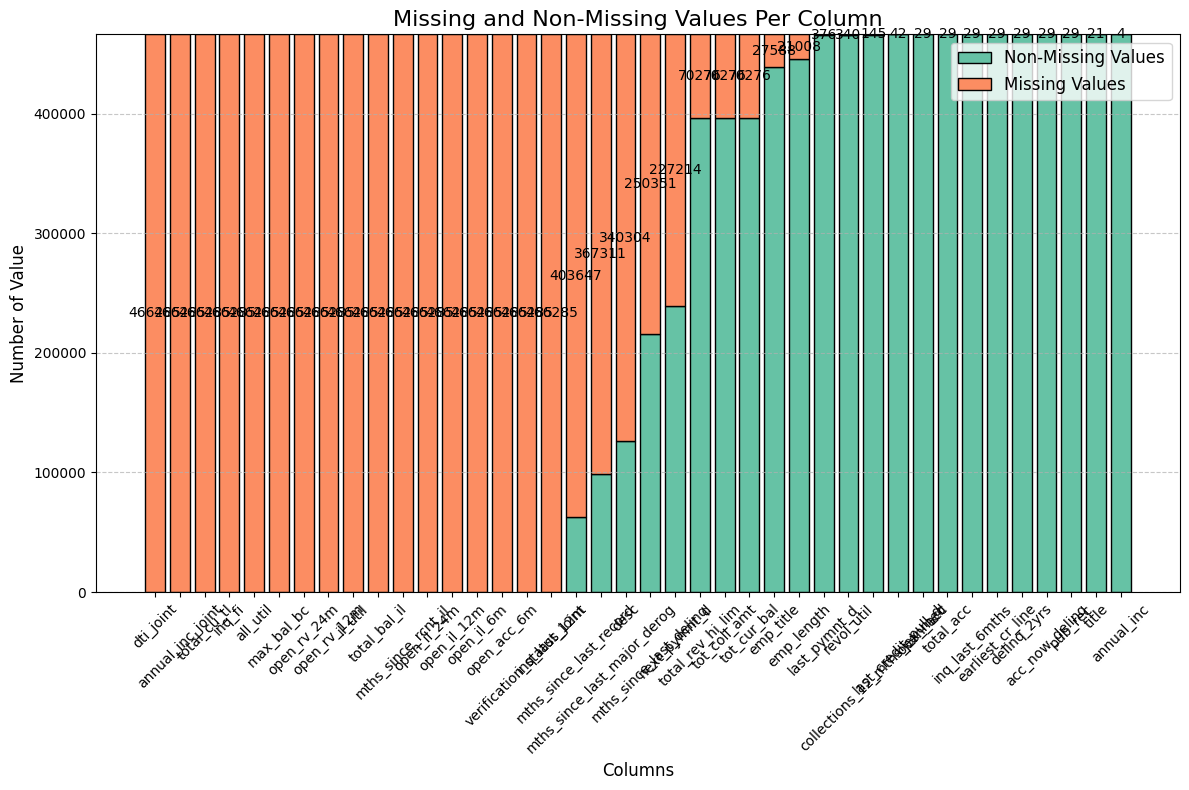

In [25]:
def plot_stacked_missing_values(df):
    #Menghitung jumlah missing value per kolom
    missing_counts = df.isnull().sum()
    non_missing_counts = df.notnull().sum()
    
    #Pilih hanya kolom yang memiliki missing values
    missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)
    non_missing_counts = non_missing_counts[missing_counts.index]
    
    if not missing_counts.empty:
        #PLot Stacked Bar Chart
        plt.figure(figsize=(12,8))
        plt.bar(missing_counts.index, non_missing_counts, label='Non-Missing Values',color='#66C2A5', edgecolor='black')
        plt.bar(missing_counts.index, missing_counts, bottom=non_missing_counts, label='Missing Values', color='#FC8D62', edgecolor='black')
        
        #Tambahkan label diatas setiap bar
        for i, (missing, non_missing) in enumerate(zip(missing_counts, non_missing_counts)):
            plt.text(i, non_missing + missing/2, f'{missing}', ha='center', va='center', fontsize=10, color='black')
        
        #Tambahkan label dan judul
        plt.title('Missing and Non-Missing Values Per Column', fontsize=16)
        plt.xlabel('Columns', fontsize=12)
        plt.ylabel('Number of Value', fontsize=12)
        plt.xticks(fontsize=10, rotation=45)
        plt.yticks(fontsize=10)
        plt.legend(fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print('Tidak ada missing values dalam DataFrame.')
plot_stacked_missing_values(data)
    
    

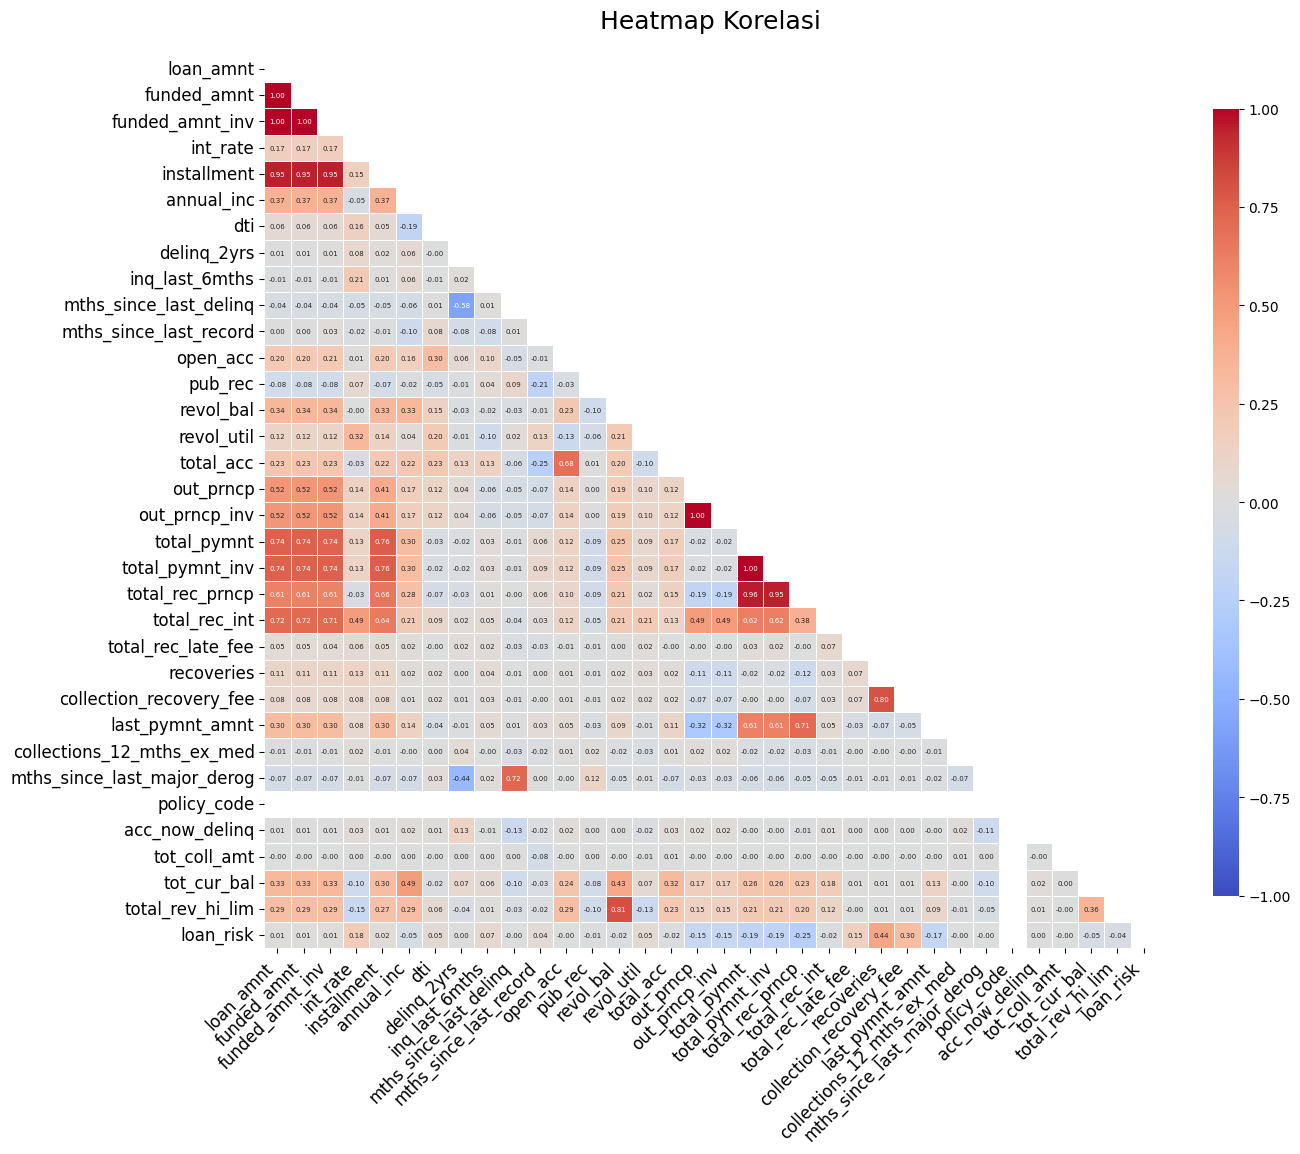

In [26]:
#Pilih kolom numerik
numeric_cols = [col for col in df.columns if df[col].dtype != 'object']
corr = df[numeric_cols].corr()

#Masking untuk menyembunyikan segitiga atas
mask = np.triu(np.ones_like(corr, dtype=bool))

#Setup tampilan heatmap
plt.figure(figsize=(14,12))
sns.heatmap(
    corr, 
    mask=mask, 
    cmap='coolwarm', #Warna heatmap
    annot=True, # #menampilkan nilai di dalam sel
    fmt='.2f', #format angka 2 desimal
    annot_kws={'size': 5}, #ukuran angka dalam sel
    vmin=-1, vmax=1, #Rentang nilai korelasi
    linewidth=0.7, #Jarak antar sel 
    square=True, #Sel berbentuk persegi
    cbar_kws={'shrink':0.8, 'aspect': 30} #ukuran colobar
)

#Tambahkan judul dan keterangan
plt.title('Heatmap Korelasi', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

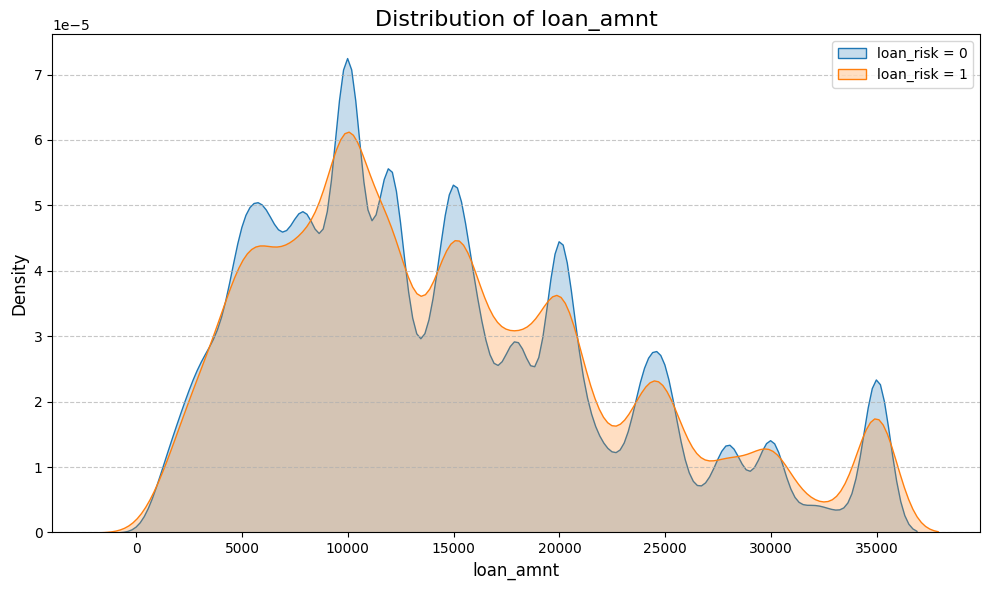

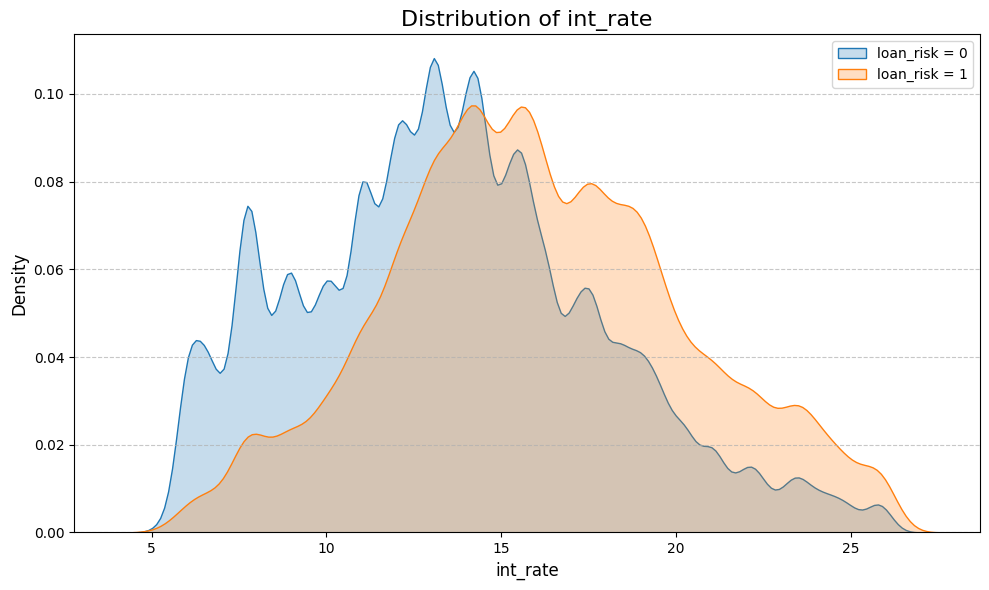

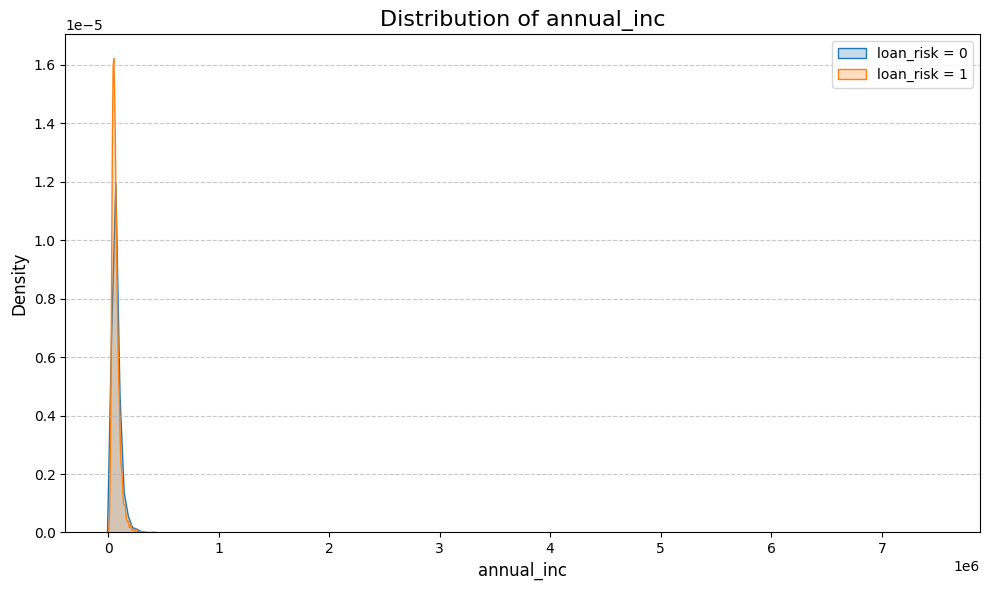

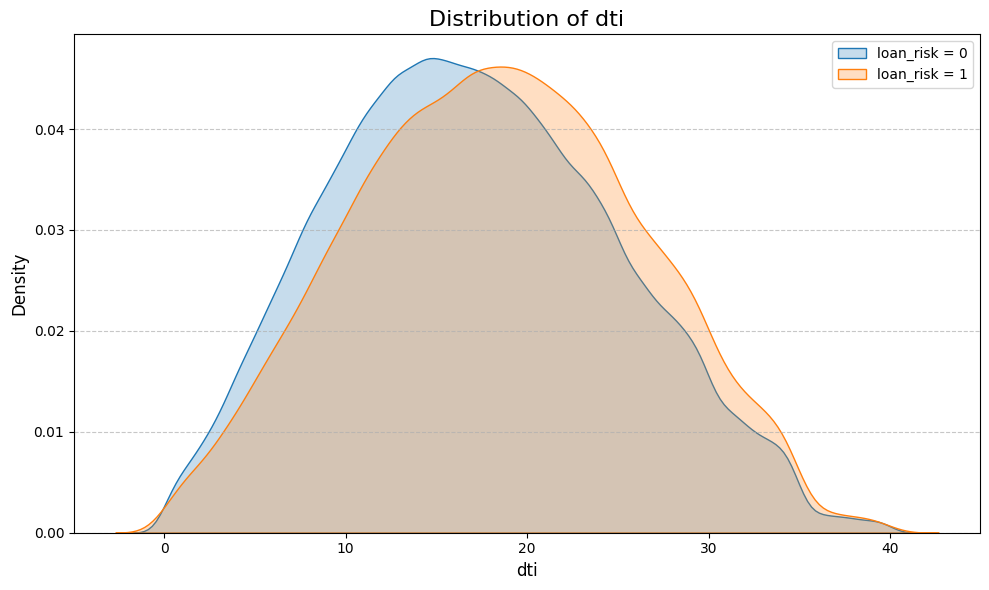

In [27]:
def plot_distribution(data, features, target=None):
    """
    Membuat distribusi histogram dan KDE untuk fitur yang diberikan.
    
    Parameters:
    - data: DataFrame yang berisi dataset.
    - features: List dari fitur yang akan dianalisis.
    - target: (Optional) Variabel target untuk visualisasi grup.
    """
    for feature in features:
        plt.figure(figsize=(10, 6))
        
        # Plot histogram dan KDE
        if target:
            # Jika target diberikan, distribusi dipisahkan berdasarkan grup
            for label in data[target].unique():
                sns.kdeplot(
                    data=data[data[target] == label][feature], 
                    label=f"{target} = {label}", 
                    fill=True
                )
        else:
            sns.histplot(data[feature], kde=True, bins=30, color='blue', alpha=0.6)
        
        # Pengaturan plot
        plt.title(f"Distribution of {feature}", fontsize=16)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel("Density", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        if target:
            plt.legend()
        plt.tight_layout()
        plt.show()

# Contoh penggunaan
features_to_analyze = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
plot_distribution(df, features_to_analyze, target='loan_risk')


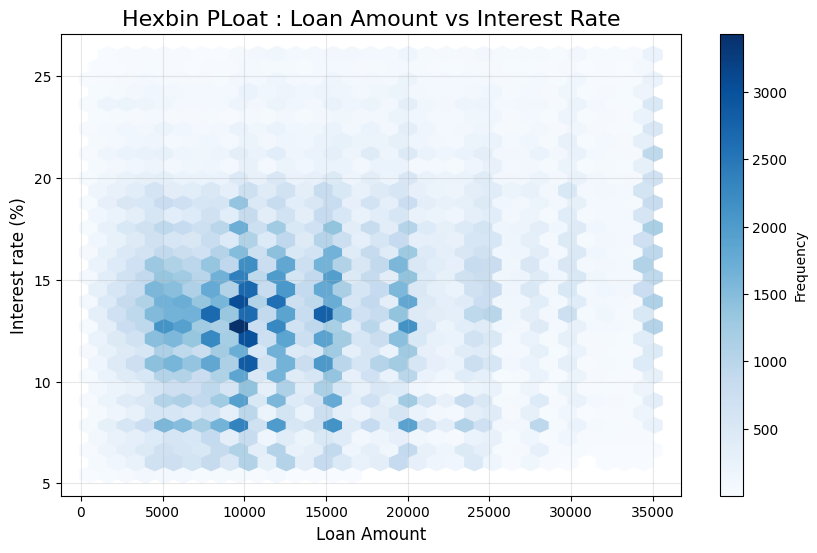

In [28]:
#Analisis interaksi antara suku bunga dengan jumlah pinjaman
plt.figure(figsize=(10, 6))
plt.hexbin(x=df['loan_amnt'], y=df['int_rate'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Frequency')
plt.title('Hexbin PLoat : Loan Amount vs Interest Rate', fontsize=16)
plt.xlabel('Loan Amount', fontsize=12)
plt.ylabel('Interest rate (%)', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

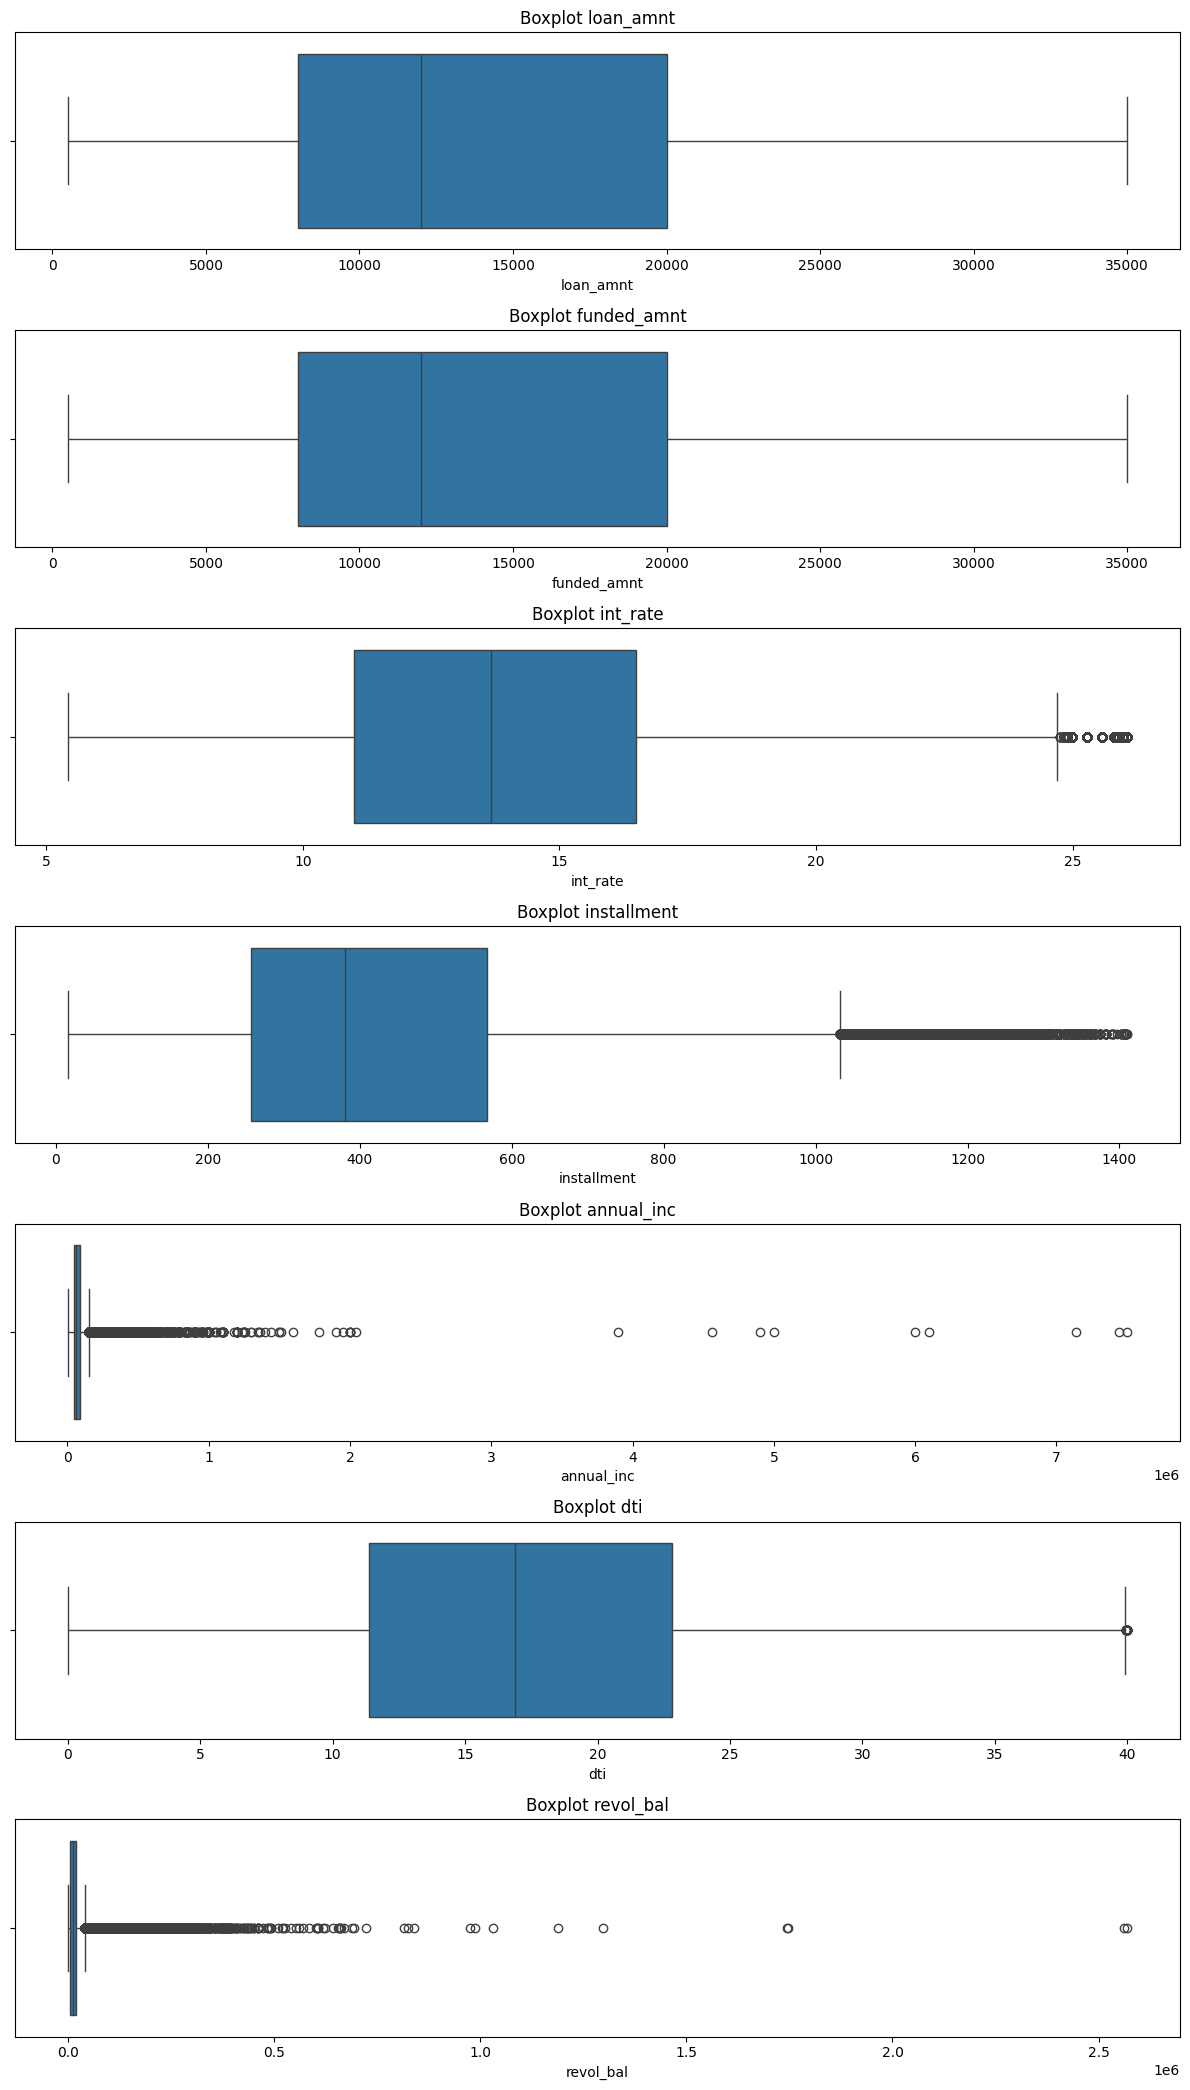

In [29]:
# Daftar fitur yang ingin divisualisasikan
features = ["loan_amnt", "funded_amnt", "int_rate", "installment", "annual_inc", "dti", "revol_bal"]

# Menentukan ukuran figure
plt.figure(figsize=(12, len(features) * 3))

# Membuat boxplot untuk setiap fitur
for i, feature in enumerate(features, 1):
    plt.subplot(len(features), 1, i)
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot {feature}")

# Menampilkan plot
plt.tight_layout()
plt.show()


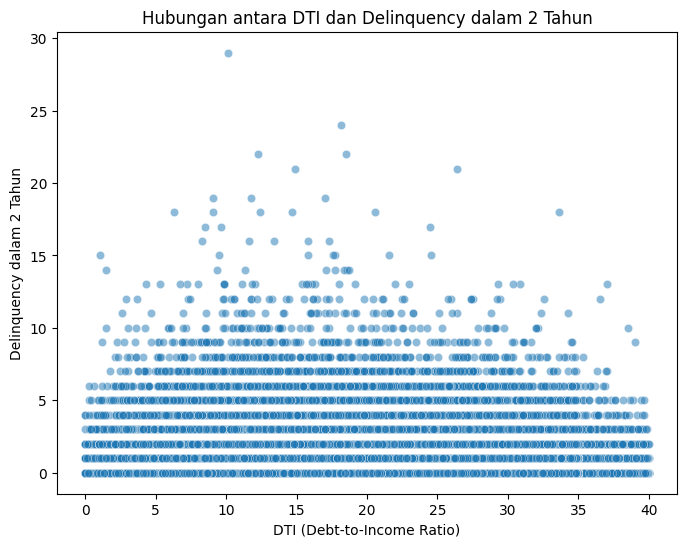

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['dti'], y=df['delinq_2yrs'], alpha=0.5)
plt.xlabel("DTI (Debt-to-Income Ratio)")
plt.ylabel("Delinquency dalam 2 Tahun")
plt.title("Hubungan antara DTI dan Delinquency dalam 2 Tahun")
plt.show()

**Feature Engineering**

**Encoding**

In [31]:
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,purpose,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,463536,463536,463536,436107,442562,463536,463536,463536,463536,463536,463536,463536,463172,236322,463496
unique,2,7,35,203964,11,6,3,91,14,50,664,2,97,3,102
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,14-Oct,debt_consolidation,CA,Oct-00,f,16-Jan,16-Feb,16-Jan
freq,335515,136575,31613,5399,149579,234619,167428,38782,273095,71126,3650,300256,179617,208390,326939


In [32]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

**Label Encoding**

In [33]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    234619
RENT        187210
OWN          41517
OTHER          144
NONE            45
ANY              1
Name: count, dtype: int64

In [34]:
df['loan_risk'].value_counts()

loan_risk
0    412111
1     51425
Name: count, dtype: int64

In [35]:
df['purpose'].value_counts()

purpose
debt_consolidation    273095
credit_card           103817
home_improvement       26323
other                  23266
major_purchase          9705
small_business          6852
car                     5333
medical                 4544
moving                  2948
vacation                2468
wedding                 2287
house                   2225
renewable_energy         348
educational              325
Name: count, dtype: int64

In [36]:
df['addr_state'].value_counts()

addr_state
CA    71126
NY    39994
TX    36258
FL    31405
IL    18465
NJ    17928
PA    16292
OH    15134
GA    14871
VA    14143
NC    12641
MI    11475
MA    10978
MD    10904
AZ    10661
WA    10471
CO     9674
MN     8122
MO     7429
CT     7142
IN     6515
NV     6490
TN     5969
OR     5932
WI     5855
AL     5821
SC     5566
LA     5464
KY     4406
KS     4164
OK     4100
AR     3473
UT     3409
NM     2573
HI     2480
WV     2402
NH     2216
RI     2041
DC     1416
MT     1385
DE     1250
AK     1246
MS     1219
WY     1124
SD      977
VT      902
ID        9
NE        8
IA        7
ME        4
Name: count, dtype: int64

In [37]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [38]:
purpose_mapping = {
    'debt_consolidation': 'Financial',
    'credit_card': 'Financial',
    'home_improvment': 'property',
    'house': 'property',
    'renewable_energy': 'property',
    'small_business': 'Business & Education',
    'educational' : 'Bussiness & Educational',
    'major_purchase':'Big Purchase',
    'car':'Big Purchase',
    'medical':'Health & Emergency',
    'moving':'Health & Emergency',
    'vacation':'Leisure & Lifestyle',
    'wedding':'Leisure & Lifestyle',
    'other':'Leisure & Lifestyle'
}
df['purpose']=df['purpose'].map(purpose_mapping)

In [39]:
#Fungsi target encode 
def target_encode(df, feature_col, target_col):
    mean_encoding = df.groupby(feature_col)[target_col].mean()
    encoded_col = df[feature_col].map(mean_encoding)
    return encoded_col

In [40]:
df['home_ownership']= target_encode(df, 'home_ownership', 'loan_risk')
df['purpose']= target_encode(df, 'purpose', 'loan_risk')
df['addr_state']= target_encode(df, 'addr_state', 'loan_risk')
df['initial_list_status']= target_encode(df, 'initial_list_status', 'loan_risk')

In [41]:
df[['home_ownership', 'purpose', 'addr_state', 'initial_list_status']]

,home_ownership,purpose,addr_state,initial_list_status
0,0.127653,0.107916,0.112747,0.121100
1,0.127653,0.094028,0.104768,0.121100
2,0.127653,0.215120,0.094720,0.121100
3,0.127653,0.135220,0.115007,0.121100
4,0.127653,0.135220,0.101652,0.121100
...,...,...,...,...
466280,0.097601,0.107916,0.097468,0.092259
466281,0.097601,0.107916,0.114425,0.121100
466282,0.097601,0.107916,0.110149,0.121100
466283,0.110653,0.107916,0.115007,0.092259


**Ordinal Encoding**
feature yang akan dilakukan ordinal encoding:
1. term
2. grade
3. sub_grade
4. emp_length
5. verification_status
emp_title tidak saya encoding sebab banyak sekali kategori dalam feature tersebut, sehingga saya memilih untuk menghapusnya.

In [42]:
df.drop(columns=['emp_title'],inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463536 entries, 0 to 466284
Data columns (total 48 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    463536 non-null  int64  
 1   funded_amnt                  463536 non-null  int64  
 2   funded_amnt_inv              463536 non-null  float64
 3   term                         463536 non-null  object 
 4   int_rate                     463536 non-null  float64
 5   installment                  463536 non-null  float64
 6   grade                        463536 non-null  object 
 7   sub_grade                    463536 non-null  object 
 8   emp_length                   442562 non-null  object 
 9   home_ownership               463536 non-null  float64
 10  annual_inc                   463536 non-null  float64
 11  verification_status          463536 non-null  object 
 12  issue_d                      463536 non-null  object 
 13  purp

In [44]:
df['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

In [45]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [46]:
df['verification_status'].unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [47]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [48]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [49]:
term_mapping = {
    ' 36 months':0, ' 60 months':1
}

grade_mapping = {
    'B':2, 'C':3, 'A':1, 'E':5, 'F':6, 'D':4, 'G':7
}

sub_grade_mapping = {'B2':2, 'C4':4, 'C5':5, 'C1':1, 'B5':5, 'A4':4, 'E1':1, 'F2':2, 'C3':3, 'B1':1, 'D1':1,
       'A1':1, 'B3':3, 'B4':4, 'C2':2, 'D2':2, 'A3':3, 'A5':5, 'D5':5, 'A2':2, 'E4':4, 'D3':3,
       'D4':4, 'F3':3, 'E3':3, 'F4':4, 'F1':1, 'E5':5, 'G4':4, 'E2':2, 'G3':3, 'G2':2, 'G1':1,
       'F5':5, 'G5':5}

emp_length_mapping = {
    '10+ years':10, '< 1 year':0, '1 year':1, '3 years':3, '8 years':8, '9 years':9,
       '4 years':4,'5 years':5, '6 years':6, '2 years':2, '7 years':7, None: -1
}

verification_mapping = {
    'Verified':1, 'Source Verified':2, 'Not Verified':0
}

df['verification_status']=df['verification_status'].map(verification_mapping)
df['emp_length']=df['emp_length'].map(emp_length_mapping)
df['sub_grade']=df['sub_grade'].map(sub_grade_mapping)
df['grade']=df['grade'].map(grade_mapping)
df['term']=df['term'].map(term_mapping)

In [50]:
df[['term', 'grade', 'sub_grade', 'emp_length', 'verification_status']]

,term,grade,sub_grade,emp_length,verification_status
0,0,2,2,10.0,1
1,1,3,4,0.0,2
2,0,3,5,10.0,0
3,0,3,1,10.0,2
4,1,2,5,1.0,2
...,...,...,...,...,...
466280,1,3,2,4.0,2
466281,1,4,5,10.0,1
466282,1,4,1,7.0,1
466283,0,1,4,3.0,1


**PEMBUATAN FITUR BARU**

In [51]:
#Proporsi jumlah pinjaman terhadap pendapatan
df['loan_to_income'] = df['loan_amnt']/df['annual_inc']
#Penggunaan kredit
df['credit_utilization'] = df['revol_bal'] / df['total_rev_hi_lim']
#presentasi cicilan bulanan
df['installment_to_income'] = df['installment'] / (df['annual_inc']/12)
#Jumlah keterlambatan pembayaran dalam laporan kredit
df['high_risk_delinquency'] = df['delinq_2yrs'].apply(lambda x: 1 if x > 1 else 0)
#Revolving Balance-to-Limit Ratio
df['revolving_utilization'] = df['revol_bal'] / df['total_rev_hi_lim']

In [52]:
#pengkategorian feature dti
dti_group = [0, 10, 20, 30, 40, 50]
dti_labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
df['dti_category'] = pd.cut(df['dti'], bins=dti_group, labels=dti_labels, right=False)

In [53]:
#Mapping ordinal dti
dti_category_mapping = {
    'Very Low': 0,
    'Low': 1,
    'Moderate': 2, 
    'High':3,
    'Very High': 4
}
df['dti_category'] = df['dti_category'].map(dti_category_mapping).astype(int)

In [54]:
#Klasifikasi feature delinq_2yrs
delinq_bins = [-1, 0, 2, 5, float('inf')] #-1 untuk menangkap nilai 0 secara tepat
delinq_labels = ['No Delinquency', 'Low', 'Moderate', 'High']
df['delinq_category'] = pd.cut(df['delinq_2yrs'], bins=delinq_bins, labels=delinq_labels, right=False)

In [55]:
#Mapping ordinal dti
delinq_category_mapping = {
    'No Delinquency': 0,
    'Low': 1,
    'Moderate' : 2,
    'High' : 3
}
df['delinq_category'] = df['delinq_category'].map(delinq_category_mapping).astype(int)

In [56]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,tot_cur_bal,total_rev_hi_lim,loan_risk,loan_to_income,credit_utilization,installment_to_income,high_risk_delinquency,revolving_utilization,dti_category,delinq_category
count,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,463536.000000,442562.000000,463536.000000,...,3.960090e+05,3.960090e+05,463536.000000,463536.000000,395854.000000,463536.000000,463536.000000,395854.000000,463536.000000,463536.000000
mean,14348.575569,14324.151792,14269.645970,0.276184,13.827334,432.891377,2.810120,2.979169,6.004379,0.110941,...,1.388017e+05,3.037909e+04,0.110941,0.219043,0.571053,0.080214,0.058138,0.571053,1.226034,1.063948
std,8287.139007,8274.892198,8287.276824,0.447109,4.365371,243.447747,1.316106,1.401332,3.624638,0.014315,...,1.521147e+05,3.724713e+04,0.314059,0.110805,0.229622,0.040234,0.234004,0.229622,0.828659,0.267353
min,500.000000,500.000000,0.000000,0.000000,5.420000,15.690000,1.000000,1.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000789,0.000000,0.000289,0.000000,0.000000,0.000000,1.000000
25%,8000.000000,8000.000000,8000.000000,0.000000,10.990000,257.430000,2.000000,2.000000,3.000000,0.097601,...,2.861800e+04,1.350000e+04,0.000000,0.132353,0.406693,0.049202,0.000000,0.406693,1.000000,1.000000
50%,12000.000000,12000.000000,12000.000000,0.000000,13.660000,381.040000,3.000000,3.000000,6.000000,0.097601,...,8.153900e+04,2.280000e+04,0.000000,0.206111,0.582433,0.075327,0.000000,0.582433,1.000000,1.000000
75%,20000.000000,20000.000000,19975.000000,1.000000,16.490000,567.342500,4.000000,4.000000,10.000000,0.127653,...,2.089530e+05,3.790000e+04,0.000000,0.298780,0.749582,0.107282,0.000000,0.749582,2.000000,1.000000
max,35000.000000,35000.000000,35000.000000,1.000000,26.060000,1409.990000,7.000000,5.000000,10.000000,0.187500,...,8.000078e+06,9.999999e+06,1.000000,0.830000,8.923333,0.320262,1.000000,8.923333,3.000000,3.000000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463536 entries, 0 to 466284
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    463536 non-null  int64  
 1   funded_amnt                  463536 non-null  int64  
 2   funded_amnt_inv              463536 non-null  float64
 3   term                         463536 non-null  int64  
 4   int_rate                     463536 non-null  float64
 5   installment                  463536 non-null  float64
 6   grade                        463536 non-null  int64  
 7   sub_grade                    463536 non-null  int64  
 8   emp_length                   442562 non-null  float64
 9   home_ownership               463536 non-null  float64
 10  annual_inc                   463536 non-null  float64
 11  verification_status          463536 non-null  int64  
 12  issue_d                      463536 non-null  object 
 13  purp

In [58]:
df.describe(include='object')

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
count,463536,463536,463172,236322,463496
unique,91,664,97,3,102
top,14-Oct,Oct-00,16-Jan,16-Feb,16-Jan
freq,38782,3650,179617,208390,326939


In [59]:
# Jika banyak kolom yang perlu dikonversi
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

for col in date_columns:
    df[col + '_month'] = pd.to_datetime(df[col], format='%d-%b', errors='coerce').dt.month

# Cek hasilnya
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,installment_to_income,high_risk_delinquency,revolving_utilization,dti_category,delinq_category,issue_d_month,earliest_cr_line_month,last_pymnt_d_month,next_pymnt_d_month,last_credit_pull_d_month
0,5000,5000,4975.0,0,10.65,162.87,2,2,10.0,0.127653,...,0.081435,0,NaN,2,1,12,NaN,1.0,NaN,1.0
1,2500,2500,2500.0,1,15.27,59.83,3,4,0.0,0.127653,...,0.023932,0,NaN,0,1,12,NaN,4.0,NaN,9.0
2,2400,2400,2400.0,0,15.96,84.33,3,5,10.0,0.127653,...,0.082595,0,NaN,0,1,12,11.0,6.0,NaN,1.0
3,10000,10000,10000.0,0,13.49,339.31,3,1,10.0,0.127653,...,0.082759,0,NaN,2,1,12,NaN,1.0,NaN,1.0
4,3000,3000,3000.0,1,12.69,67.79,2,5,1.0,0.127653,...,0.010169,0,NaN,1,1,12,NaN,1.0,2.0,1.0


In [60]:
time_features = ['issue_d_month', 'last_pymnt_d_month', 'next_pymnt_d_month', 'last_credit_pull_d_month', 'earliest_cr_line_month']
df[time_features]

,issue_d_month,last_pymnt_d_month,next_pymnt_d_month,last_credit_pull_d_month,earliest_cr_line_month
0,12,1.0,NaN,1.0,NaN
1,12,4.0,NaN,9.0,NaN
2,12,6.0,NaN,1.0,11.0
3,12,1.0,NaN,1.0,NaN
4,12,1.0,2.0,1.0,NaN
...,...,...,...,...,...
466280,1,1.0,2.0,1.0,4.0
466281,1,12.0,NaN,1.0,NaN
466282,1,1.0,2.0,12.0,12.0
466283,1,12.0,NaN,4.0,2.0


In [61]:
for col in time_features:
    # Pastikan kolom tidak memiliki nilai NaN sebelum encoding
    df[col] = df[col].fillna(0)  # Atau Anda bisa mengganti 0 dengan nilai default lain
    # Lakukan cyclical encoding
    df[f'{col}_sin'] = np.sin(2 * np.pi * df[col] / 12)
    df[f'{col}_cos'] = np.cos(2 * np.pi * df[col] / 12)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463536 entries, 0 to 466284
Data columns (total 70 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     463536 non-null  int64  
 1   funded_amnt                   463536 non-null  int64  
 2   funded_amnt_inv               463536 non-null  float64
 3   term                          463536 non-null  int64  
 4   int_rate                      463536 non-null  float64
 5   installment                   463536 non-null  float64
 6   grade                         463536 non-null  int64  
 7   sub_grade                     463536 non-null  int64  
 8   emp_length                    442562 non-null  float64
 9   home_ownership                463536 non-null  float64
 10  annual_inc                    463536 non-null  float64
 11  verification_status           463536 non-null  int64  
 12  issue_d                       463536 non-null  ob

In [63]:
df.drop(columns=['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d'],inplace=True)

In [64]:
df = df.replace([np.inf, -np.inf], np.nan)
df.fillna(-1, inplace=True)

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df) 

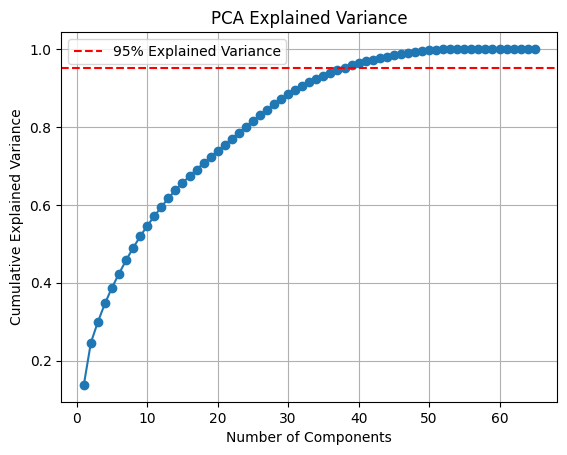

Number of components to retain 95% variance: 38


In [66]:
from sklearn.decomposition import PCA
import numpy as np

#PCA untuk reduksi dimensi
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

#Menentukan jumlah komponen optimal
explained_variance = np.cumsum(pca.explained_variance_ratio_)

#Visualisasi varian
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.legend()
plt.grid()
plt.show()

# Pilih jumlah komponen untuk 90% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Number of components to retain 95% variance: {n_components}")

In [67]:
df.fillna(-1, inplace=True)

**MODELING**

In [68]:
#cek distribusi label target
df['loan_risk'].value_counts()

loan_risk
0    412111
1     51425
Name: count, dtype: int64

In [69]:
#Melakukan pemisahan untuk data train dan test
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_risk']).copy() #Fitur
y = df['loan_risk'] #Label target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463536 entries, 0 to 466284
Data columns (total 65 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   loan_amnt                     463536 non-null  int64  
 1   funded_amnt                   463536 non-null  int64  
 2   funded_amnt_inv               463536 non-null  float64
 3   term                          463536 non-null  int64  
 4   int_rate                      463536 non-null  float64
 5   installment                   463536 non-null  float64
 6   grade                         463536 non-null  int64  
 7   sub_grade                     463536 non-null  int64  
 8   emp_length                    463536 non-null  float64
 9   home_ownership                463536 non-null  float64
 10  annual_inc                    463536 non-null  float64
 11  verification_status           463536 non-null  int64  
 12  purpose                       463536 non-null  fl

In [71]:
#Handling Missing Value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Bisa pakai median atau modus
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [72]:
print(pd.DataFrame(X_train).isnull().sum())  # Cek apakah masih ada NaN

0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64


In [84]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Hitung class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y)

# Konversi ke dictionary
class_weights_dict = {cls: weight for cls, weight in zip(np.unique(y), class_weights)}

print("Class Weights:", class_weights_dict)

Class Weights: {0: 0.5623921710412971, 1: 4.50691298006806}


In [91]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# Model 1: Logistic Regression
model_lr = LogisticRegression(class_weight='balanced', solver='lbfgs', random_state=42, max_iter=1000, verbose=1)
model_lr.fit(X_train_scaled, y_train)

# Model 2: Random Forest Classifier
model_rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced', max_depth=6)
model_rf.fit(X_train, y_train)

#Model 3: LighGBM
lgb_model = LGBMClassifier(num_leaves=64, n_estimators=200, learning_rate=0.1, 
                           max_depth=6, random_state=42, verbose=-1, min_data_in_leaf=20, lambda_l1=0.1, lambda_l2=0.1)
lgb_model.fit(X_train, y_train)

#Model 4: CatBoost
cat_model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_seed=42)
cat_model.fit(X_train, y_train)

c:\Users\ASUS A456UR\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    print(f"===== {model_name} =====")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\n" + "="*50 + "\n")

# Evaluasi Logistic Regression
evaluate_model(model_lr, X_test_scaled, y_test, "Logistic Regression")

# Evaluasi Random Forest Classifier
evaluate_model(model_rf, X_test, y_test, "Random Forest Classifier")

# Evaluasi LightGBM
evaluate_model(lgb_model, X_test, y_test, "LightGBM")

# Evaluasi CatBoost
evaluate_model(cat_model, X_test, y_test, "CatBoost")


===== Logistic Regression =====
Accuracy: 0.9886
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82423
           1       0.95      0.95      0.95     10285

    accuracy                           0.99     92708
   macro avg       0.97      0.97      0.97     92708
weighted avg       0.99      0.99      0.99     92708

Confusion Matrix:
[[81889   534]
 [  525  9760]]


===== Random Forest Classifier =====
Accuracy: 0.9802
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     82423
           1       0.89      0.94      0.91     10285

    accuracy                           0.98     92708
   macro avg       0.94      0.96      0.95     92708
weighted avg       0.98      0.98      0.98     92708

Confusion Matrix:
[[81243  1180]
 [  653  9632]]




c:\Users\ASUS A456UR\anaconda3\envs\tf_env\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


===== LightGBM =====
Accuracy: 0.9940
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     82423
           1       1.00      0.95      0.97     10285

    accuracy                           0.99     92708
   macro avg       1.00      0.97      0.98     92708
weighted avg       0.99      0.99      0.99     92708

Confusion Matrix:
[[82402    21]
 [  535  9750]]


===== CatBoost =====
Accuracy: 0.9934
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     82423
           1       1.00      0.94      0.97     10285

    accuracy                           0.99     92708
   macro avg       1.00      0.97      0.98     92708
weighted avg       0.99      0.99      0.99     92708

Confusion Matrix:
[[82404    19]
 [  591  9694]]


